Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
sum = 0
sum_squared = 0

for i in range(1, 101):
  sum += i
  sum_squared += (i ** 2)

squared_sum = sum ** 2
difference = squared_sum - sum_squared
print(difference)

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


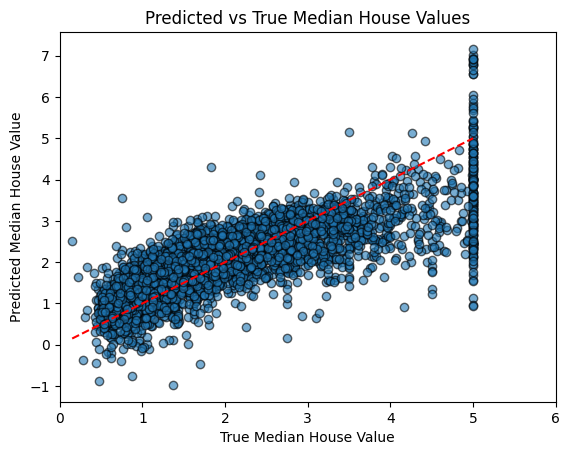

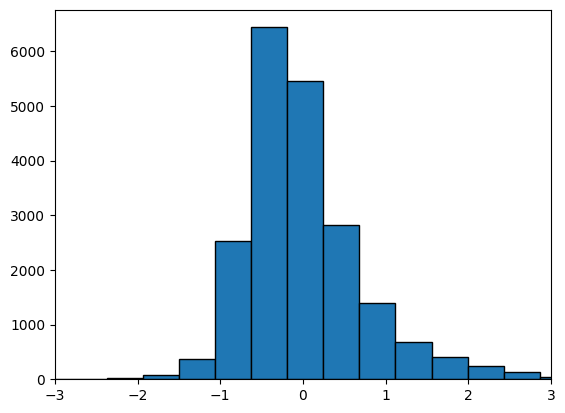


Feature Importance (Linear Regression Coefficients):
AveBedrms     0.593215
MedInc        0.433333
HouseAge      0.009293
Population   -0.000008
AveOccup     -0.004745
AveRooms     -0.098643
Latitude     -0.421449
Longitude    -0.434166
dtype: float64
r^2: 
 0.5943232652466202
RMSE: 
 0.7273129773603114
MAE: 
 0.535126133655451


In [67]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

plt.scatter(y_test, y_pred, alpha = 0.6, edgecolors = "k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "r--")
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs True Median House Values")
plt.xlim(0, 6)
plt.show()

y_pred_all = model.predict(X)
residuals = y - y_pred_all
plt.hist(residuals, bins = 25, edgecolor = "k")
plt.xlim(-3, 3)
plt.show()

importance = pd.Series(model.coef_, index=feature_names)
print("\nFeature Importance (Linear Regression Coefficients):")
print(importance.sort_values(ascending=False))
print("r^2: \n", r2_score(y_test, y_pred))
print("RMSE: \n", rmse)
print("MAE: \n", mean_absolute_error(y_test, y_pred))

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# your code here